**Hey, I am trying to perform attacker vs defender analysis for GoT battles. Let's start!**
------------------------------------------------------------------------

First, let's import the packages we'll be using in this kernel.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
%matplotlib inline

Let's take a look at the data.

In [4]:
battles = pd.read_csv("battles.csv")
battles.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


Let me choose the required fields only

In [5]:
battles = battles[['name','year','attacker_king','defender_king','attacker_outcome']]
battles.head()

,name,year,attacker_king,defender_king,attacker_outcome
0,Battle of the Golden Tooth,298,Joffrey/Tommen Baratheon,Robb Stark,win
1,Battle at the Mummer's Ford,298,Joffrey/Tommen Baratheon,Robb Stark,win
2,Battle of Riverrun,298,Joffrey/Tommen Baratheon,Robb Stark,win
3,Battle of the Green Fork,298,Robb Stark,Joffrey/Tommen Baratheon,loss
4,Battle of the Whispering Wood,298,Robb Stark,Joffrey/Tommen Baratheon,win


Producing the battle outcome in integer format so that it will be easier for me later

In [6]:
battles['outcome'] = (battles['attacker_outcome'] == 'win')*1
battles.head()

,name,year,attacker_king,defender_king,attacker_outcome,outcome
0,Battle of the Golden Tooth,298,Joffrey/Tommen Baratheon,Robb Stark,win,1
1,Battle at the Mummer's Ford,298,Joffrey/Tommen Baratheon,Robb Stark,win,1
2,Battle of Riverrun,298,Joffrey/Tommen Baratheon,Robb Stark,win,1
3,Battle of the Green Fork,298,Robb Stark,Joffrey/Tommen Baratheon,loss,0
4,Battle of the Whispering Wood,298,Robb Stark,Joffrey/Tommen Baratheon,win,1


Plotting number of battles the attackers were involved in a bar graph format

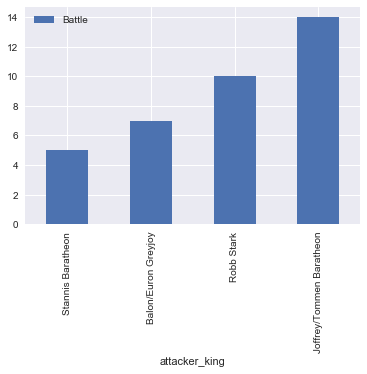

In [8]:
attack = pd.DataFrame(battles.groupby("attacker_king").size().sort_values())
attack = attack.rename(columns = {0:'Battle'})
attack.plot(kind='bar')

Plotting number of battles the defenders were involved in a bar graph format

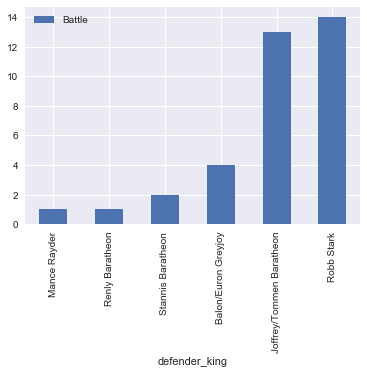

In [9]:
defend = pd.DataFrame(battles.groupby("defender_king").size().sort_values())
defend = defend.rename(columns = {0:'Battle'})
defend.plot(kind='bar')

Pivoting and comparing attacker vs defender battles

In [10]:
pvt = battles.pivot_table(index='attacker_king',columns='defender_king',aggfunc='sum',values='outcome')
pvt

defender_king,Balon/Euron Greyjoy,Joffrey/Tommen Baratheon,Mance Rayder,Renly Baratheon,Robb Stark,Stannis Baratheon
attacker_king,,,,,,
Balon/Euron Greyjoy,1.0,2.0,NaN,NaN,4.0,NaN
Joffrey/Tommen Baratheon,1.0,NaN,NaN,NaN,9.0,2.0
Robb Stark,1.0,7.0,NaN,NaN,NaN,NaN
Stannis Baratheon,1.0,0.0,0.0,1.0,NaN,NaN


The heatmap shows a good picture of the battles. Looks like Joffrey's the meanest attacker in the history of Game of Thrones. 9 battles won against the Starks alone! Sweet!

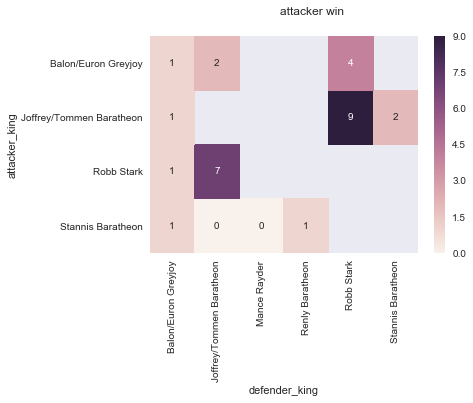

In [12]:
sns.heatmap(pvt,annot=True)
sns.plt.suptitle('attacker win')

Thank you for reading!